In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
visa_df=pd.read_csv(r"C:\Users\SIRI\OneDrive\nareshit\EDA\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Bi variable anaylsis**
- anaylse the two variables
- Two categorical columns
- Two numerical columns
- one categorical and one numerical

**Categorical vs Categorical**


In [15]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [16]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [17]:
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**continent-case_status**

In [18]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [19]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**How many asia people got the visa Certified**

**How many asia people got the visa Denied**

In [20]:
con1=(visa_df['continent']=='Asia')
con2=visa_df['case_status']=='Certified'
con=con1&con2
len(visa_df[con])
print(f"the number of employees visa certified are: {len(visa_df[con])}")

the number of employees visa certified are: 11012


In [21]:
con1=(visa_df['continent']=='Asia')
con2=visa_df['case_status']=='Denied'
con=con1&con2
len(visa_df[con])
print(f"the number of employees visa certified are: {len(visa_df[con])}")

the number of employees visa certified are: 5849


In [22]:
keys=visa_df['continent'].unique()
certified_list,denied_list=[],[]
for i in keys:
    con1=(visa_df['continent']==i)
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1&con2
    denied_con=con1&con3
    certified_list.append(len(visa_df[certi_con]))
    denied_list.append(len(visa_df[denied_con]))

pd.DataFrame(zip(certified_list,denied_list),
            columns=['Certified','Denied'],
            index=keys)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

-cross tab will take two arguments
- first arguments:index
- second argument:index

In [23]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [24]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2=pd.crosstab(col2,col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

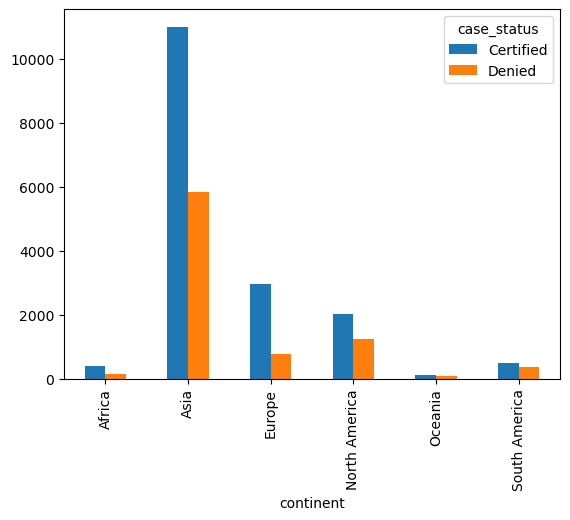

In [25]:
result1.plot(kind='bar')

<Axes: xlabel='case_status'>

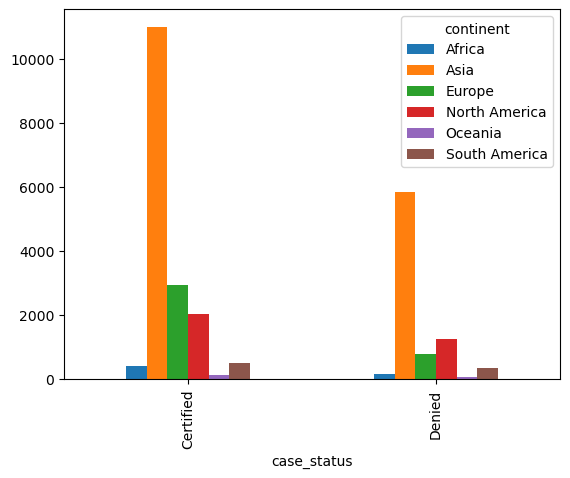

In [26]:
result2.plot(kind='bar')

In [27]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result3=pd.crosstab(col,col3)
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

**Numerical-Numerical**
- in order to plot numericl vs numerical we need to use scatter plots
- scatter plots will give the relation between two numerical columns
- it is under matplotlib

**plt.sactter**

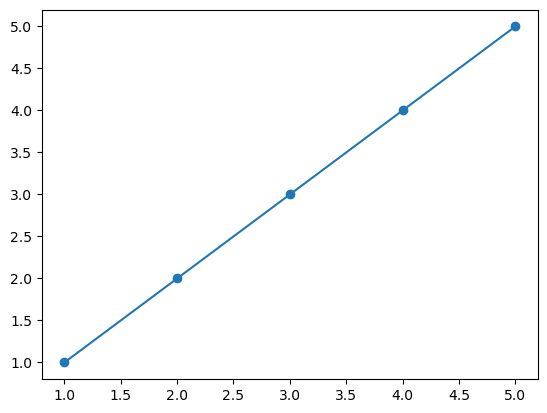

In [28]:
 x=[1,2,3,4,5]
 y=[1,2,3,4,5]
# it is y=x plot
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

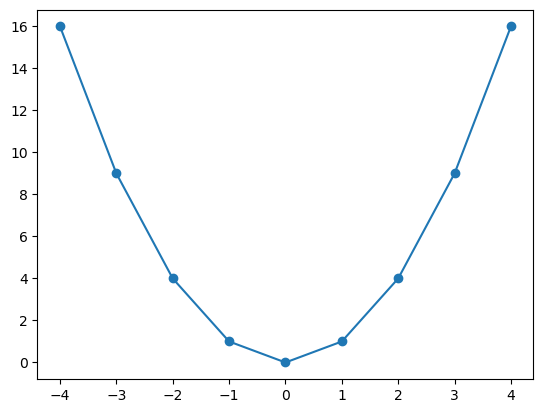

In [29]:
x=[i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [30]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Scatter-1**

- no_of_employees and yr_of_estab

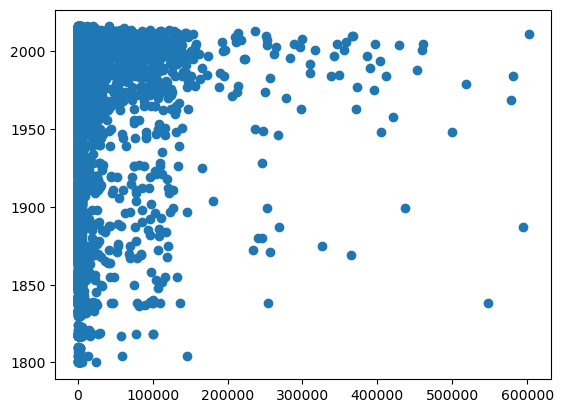

In [31]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

**observation**:No relation

 pearson correlation coeff=0

**Scatter plot_2**

  - no_of_employees and prevailing_wage


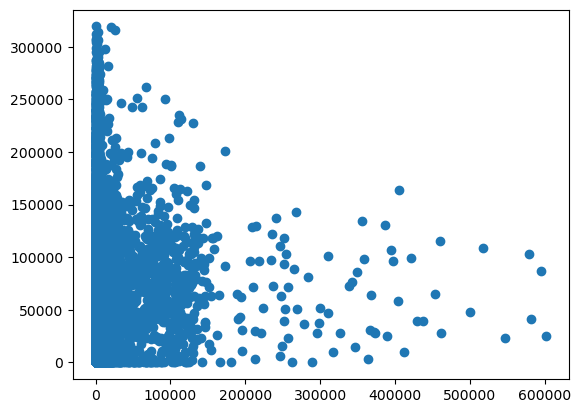

In [32]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

**observation**: No relation

pearson correlation coeff=0



**Scatter plot-3**

- yr_of_estab and prevailing_wage

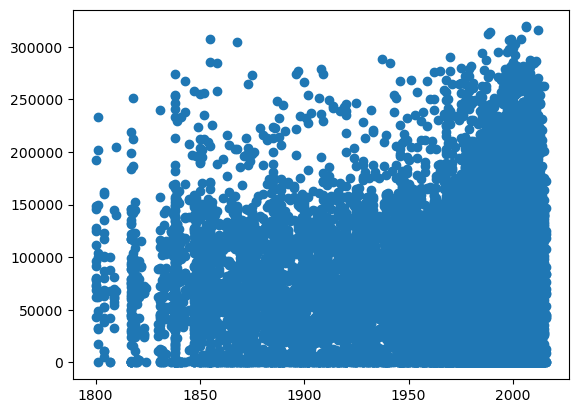

In [33]:
col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

**observation**:No relation

pearson correlation coeff=0

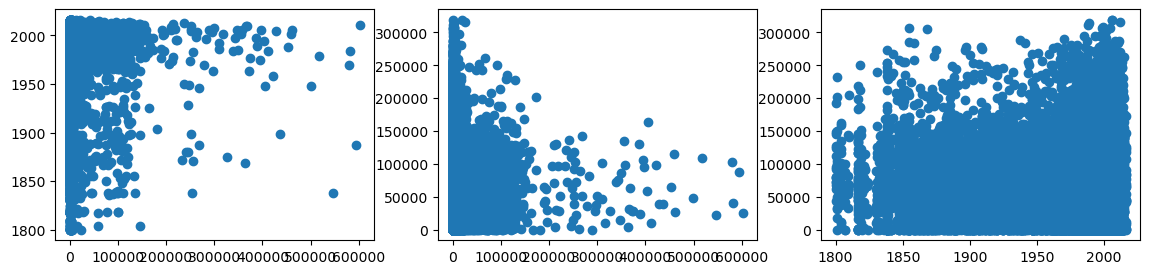

In [34]:
plt.figure(figsize=(14,3))

col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)


col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)


col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,3).scatter(col1,col2)

**Correlation Coeffiecient**

- pearson correlation coefficient will give the amount of relation between variable
- it is denoted with r
- For positive relation r varies from 0 to 1
- For negative relation r varies from -1 to 0
- For no relation r approximate 0
- In python code we have corr function under pandas
     - This will give covariance matrix 
     - We already discussed covariance matrix is row and columns type
     - In this data we have 3 numerical columns
     - so we will get 3*3 9 values
     - All trace of the matrix represents variance
     - Upper triangle and lower triangle represent co variance

In [35]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


 **Obsevartions**

- The correlation value between no_of_employees and yr_of_estab approximately zero
  which indicates no relation

- The correlation value between no_of_employees and prevailing_wage approximately zero
  which indicates no relation

- The correlation value between no_of_employees and yr_of_estab approximately zero
  which indicates no relation




**what happen if condition is high**

In [36]:
wine_data=pd.read_csv("C:\\Users\\SIRI\\OneDrive\\nareshit\\EDA\\winequality_red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
wine_data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [38]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
len(wine_data.columns)

12

In [40]:
# correaltion 12
# 12*12=144
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**heat map**

- heat map will provide the matrix representation of correlation value

- heat map represent values in colour format

- different different values in different colour

- beside matrix it will display colour bar 

- colour bar means like as scale of values with colour

<Axes: >

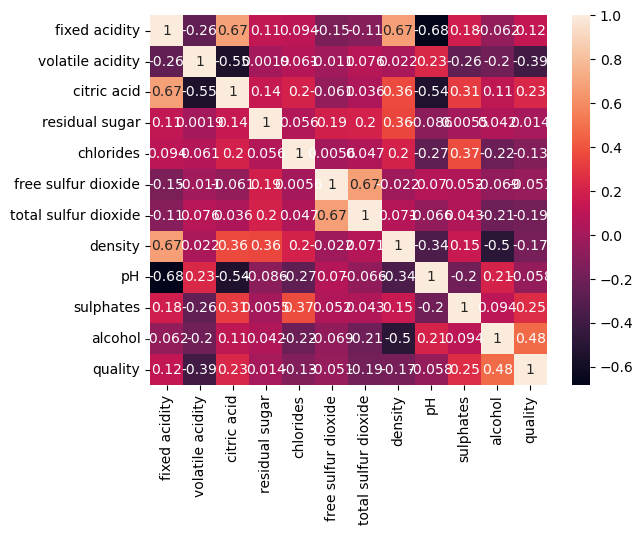

In [41]:
wine_corr=wine_data.corr()
sns.heatmap(wine_corr,annot=True)

<Axes: >

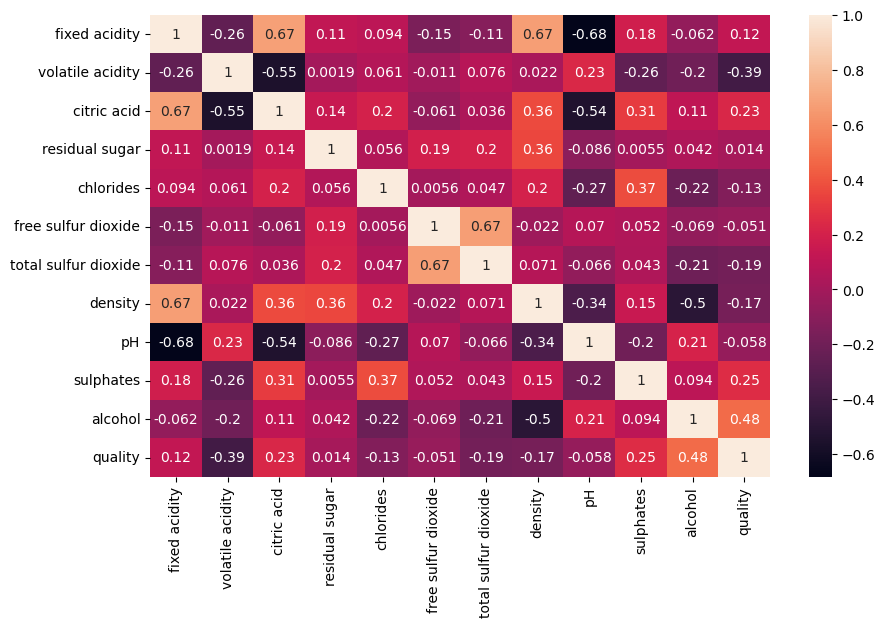

In [42]:
wine_corr=wine_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True)

In [43]:
!pip install seaborn --upgrade

In [44]:
sns.__version__

'0.13.2'

<Axes: >

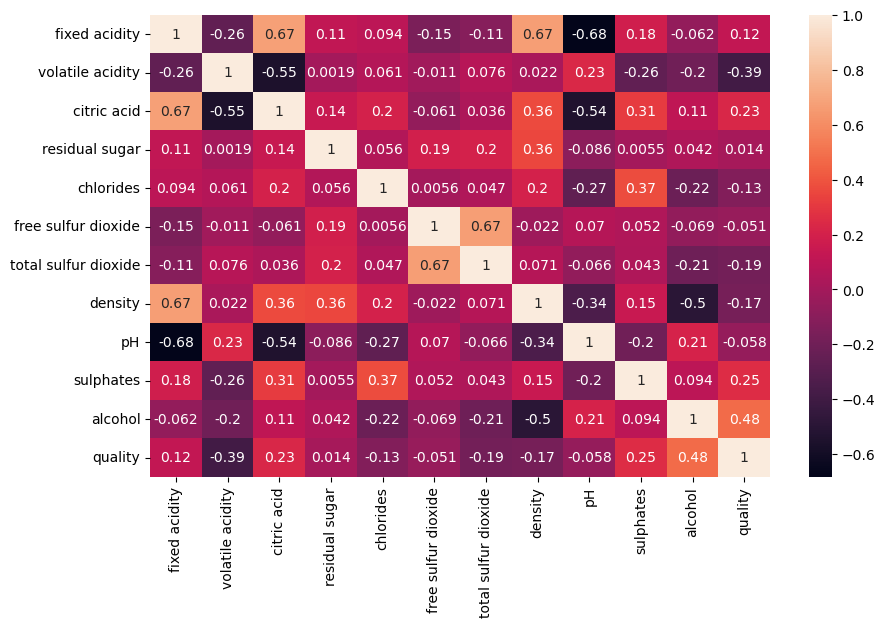

In [45]:
wine_corr=wine_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True)

<Axes: >

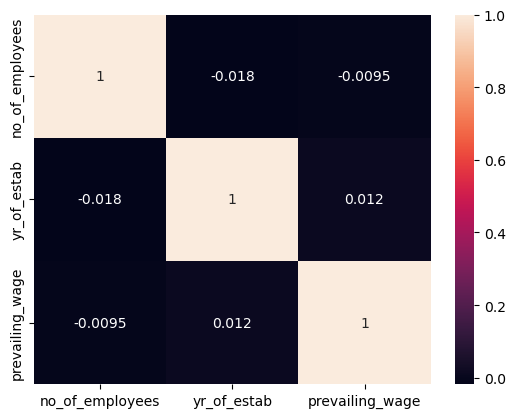

In [46]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

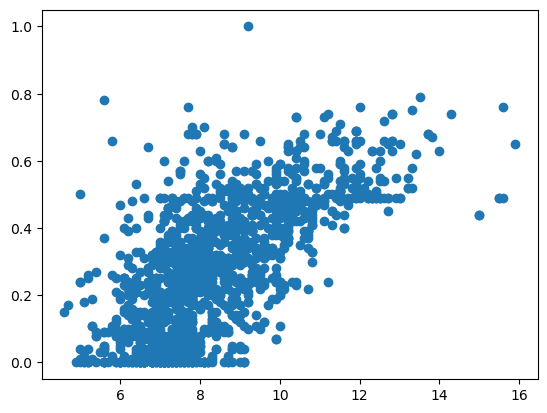

In [48]:
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.scatter(col1,col2)